In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from cmocean import cm

import warnings
warnings.filterwarnings("ignore")

In [2]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')

In [3]:
def calc_stats(x, y):
    stats = {}
    MSE = np.mean((y - x)**2)
    stats['RMSE'] = np.sqrt(MSE)
    stats['bias'] = np.mean(y) - np.mean(x)
    stats['WSS'] = 1 - MSE / np.mean((abs(y - np.mean(x)) + abs(x - np.mean(x)))**2)
    
    return stats


def plot_panel(ax, x, y, lims, units):
    stats = calc_stats(x, y)

    statstext = f"RMSE = {stats['RMSE']:.3f} {units}\nbias = {stats['bias']:.3f} {units}\nWSS = {stats['WSS']:.3f}"
    
    props = dict(boxstyle='round', facecolor='w', alpha=0.9)
    c = ax.text(0.5, 0.04, statstext, bbox=props, transform=ax.transAxes, fontsize=9)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    return c


In [4]:
ctd2017 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/multi_ctd_2017.p')
ctd2018 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/multi_ctd_2018.p')
ctd2019 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/multi_ctd_2019.p')
ctd2020 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/multi_ctd_2020.p')
ctd2021 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/multi_ctd_2021.p')

# ctd = pd.concat([ctd2017, ctd2018, ctd2019, ctd2020, ctd2021], ignore_index=True)
# dfo_ctd = dfo_ctd.drop(axis=1,labels=['name','cruise'])

In [5]:
bot2017 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/multi_bottle_2017.p')
bot2018 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/multi_bottle_2018.p')
bot2019 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/multi_bottle_2019.p')
bot2020 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/multi_bottle_2020.p')
bot2021 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/multi_bottle_2021.p')

# bot = pd.concat([bot2017, bot2018, bot2019, bot2020, bot2021], ignore_index=True)

In [6]:
obs = pd.concat([bot2017['obs'], bot2018['obs'], bot2019['obs'], bot2020['obs'], bot2021['obs']], ignore_index=True)
obs.name = 'bottle' # so that we can differentiate between bottle and ctd casts from dfo just in case
obs = pd.concat([obs,ctd2017['obs'], ctd2018['obs'], ctd2019['obs'], ctd2020['obs'], ctd2021['obs']], ignore_index=True)
obs.head()


,cid,lon,lat,time,z,SA,CT,DO (uM),NO3 (uM),Chl (mg m-3),name,cruise,source,NO2 (uM),NH4 (uM),PO4 (uM),TA (uM),DIC (uM)
0,0.0,-126.334,48.624500,2017-02-07 14:50:45,-5.900000,32.698785,9.202596,282.233429,5.9,0.57,bottle,None,dfo1,NaN,NaN,NaN,NaN,NaN
1,0.0,-126.334,48.624500,2017-02-07 14:50:45,-101.000000,33.011381,9.468307,227.394394,NaN,NaN,bottle,None,dfo1,NaN,NaN,NaN,NaN,NaN
2,0.0,-126.334,48.624500,2017-02-07 14:50:45,-800.400024,34.465713,3.977202,12.102098,NaN,NaN,bottle,None,dfo1,NaN,NaN,NaN,NaN,NaN
3,1.0,-126.667,48.648499,2017-02-07 16:39:50,-200.300003,34.024404,7.695498,139.330414,NaN,NaN,bottle,None,dfo1,NaN,NaN,NaN,NaN,NaN
4,1.0,-126.667,48.648499,2017-02-07 16:39:50,-200.399994,34.024506,7.696186,139.776993,NaN,NaN,bottle,None,dfo1,NaN,NaN,NaN,NaN,NaN


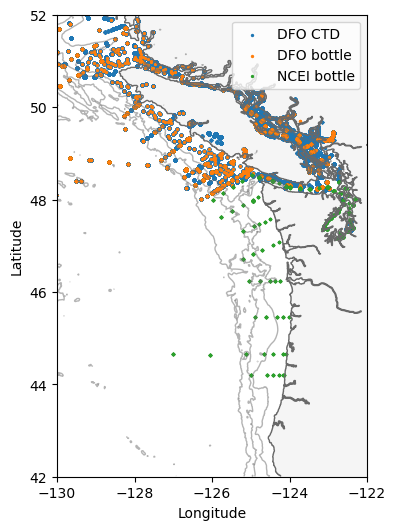

In [7]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([42,52])
ax.set_xlim([-130,-122])


# plot the location of observations
ax.scatter(obs.lon[(obs.source=='dfo1') & (obs.name != 'bottle')], obs.lat[(obs.source=='dfo1') & (obs.name != 'bottle')], s=2, label="DFO CTD")
ax.scatter(obs.lon[(obs.source=='dfo1') & (obs.name == 'bottle')], obs.lat[(obs.source=='dfo1') & (obs.name == 'bottle')], s=2, label="DFO bottle")
ax.scatter(obs.lon[obs.source!='dfo1'], obs.lat[obs.source!='dfo1'], s=2, label="NCEI bottle")
ax.legend()


In [8]:
mod = pd.concat([bot2017['cas6_v0_live'], bot2018['cas6_v0_live'], bot2019['cas6_v0_live'], bot2020['cas6_v0_live'], bot2021['cas6_v0_live']], ignore_index=True)
mod.name = 'bottle' # so that we can differentiate between bottle and ctd casts from dfo just in case
mod = pd.concat([mod,ctd2017['cas6_v0_live'], ctd2018['cas6_v0_live'], ctd2019['cas6_v0_live'], ctd2020['cas6_v0_live'], ctd2021['cas6_v0_live']], ignore_index=True)

mod.head()

,cid,cruise,time,lat,lon,name,z,source,h,CT,SA,Chl (mg m-3),DO (uM),NO3 (uM),NO2 (uM),NH4 (uM),TA (uM),DIC (uM)
0,0.0,None,2017-02-07 14:50:45,48.624500,-126.334,bottle,-5.900000,dfo1,735.887373,9.088592,32.862988,0.273642,269.996063,13.086154,NaN,NaN,2257.449219,2110.650635
1,0.0,None,2017-02-07 14:50:45,48.624500,-126.334,bottle,-101.000000,dfo1,735.887373,8.981697,33.251315,0.070246,206.819122,19.455011,NaN,NaN,2274.745605,2171.879150
2,0.0,None,2017-02-07 14:50:45,48.624500,-126.334,bottle,-800.400024,dfo1,735.887373,4.336478,34.391204,0.002598,20.064367,43.055576,NaN,NaN,2392.371094,2396.339844
3,1.0,None,2017-02-07 16:39:50,48.648499,-126.667,bottle,-200.300003,dfo1,1325.100506,8.240205,33.514741,0.007162,164.177872,24.212177,NaN,NaN,2288.145264,2214.501221
4,1.0,None,2017-02-07 16:39:50,48.648499,-126.667,bottle,-200.399994,dfo1,1325.100506,8.240205,33.514741,0.007162,164.177872,24.212177,NaN,NaN,2288.145264,2214.501221


### but these station locations don't match what's in MacCready 2021!
### another file to see if i can reproduce those

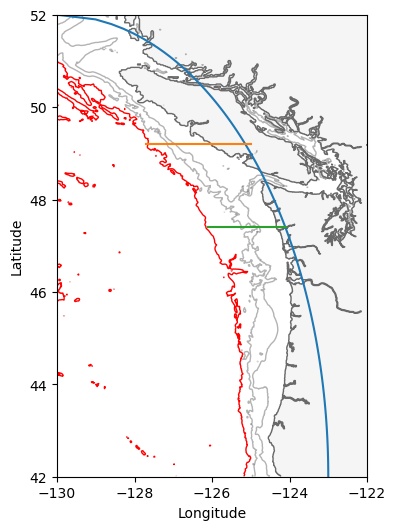

In [9]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')

fig, ax = plt.subplots(1,1,figsize=(4, 6))

ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000], colors='dimgray', alpha=0.5)
ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[2000], colors='r')

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([42,52])
ax.set_xlim([-130,-122])

# salish sea cuttoff
y=np.linspace(42,52,100)
x = np.sqrt((1-((y-42)**2)/(10**2))*(7**2))-130
ax.plot(x,y)

#north cuttoff
ax.plot([-127.7,-125],[49.2,49.2])

# south cuttoff
ax.plot([-126.1,-124.1],[47.4,47.4])

In [10]:
ny = 49.2
sy = 47.4
d = 2000

# code for seperating observations into groups based on location and depth
def region(lat,lon,d):
    if d >= 2000:
        return 1 #offshore
    elif lon > np.sqrt((1-(((lat-42)**2)/(10**2)))*(7**2))-130 and lat < 51:
        return 2 #salish sea
    elif lat > ny:
        return 3 #north
    elif lat < sy:
        return 4 #south
    else:
        return 5 #domain


In [11]:
regions = ['Offshore', 'Salish Sea', 'North', 'South', 'Domain']
obs['region'] = [region(obs.lat[i],obs.lon[i],mod.h[i]) for i in range(len(obs))]
mod['region'] = obs.region


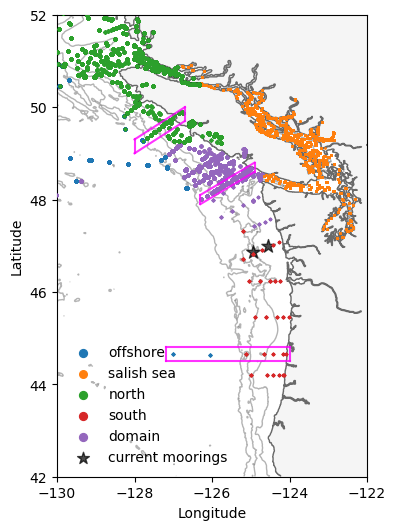

In [30]:
# quick visual check to see if seperated properly
fig, ax = plt.subplots(1,1,figsize=(4, 6))

ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke',zorder=1)
ax.contour(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray', zorder=2)
ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5, zorder=0)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([42,52])
ax.set_xlim([-130,-122])


# plot the location of observations
ax.scatter(obs.lon[obs.region == 1], obs.lat[obs.region == 1], s=2, label="offshore",zorder=4)
ax.scatter(obs.lon[obs.region == 2], obs.lat[obs.region == 2], s=1, label="salish sea",zorder=4)
ax.scatter(obs.lon[obs.region == 3], obs.lat[obs.region == 3], s=2, label="north",zorder=4)
ax.scatter(obs.lon[obs.region == 4], obs.lat[obs.region == 4], s=2, label="south",zorder=4)
ax.scatter(obs.lon[obs.region == 5], obs.lat[obs.region == 5], s=2, label="domain",zorder=3)


# plot lil boxes around areas that you compare in crosssections.ipynb
#newport line?
plt.plot([-127.2,-124],[44.8,44.8],c='magenta',alpha=0.8,zorder=5)
plt.plot([-127.2,-124],[44.5,44.5],c='magenta',alpha=0.8,zorder=5)
plt.plot([-127.2,-127.2],[44.8,44.5],c='magenta',alpha=0.8,zorder=5)
plt.plot([-124,-124],[44.8,44.5],c='magenta',alpha=0.8,zorder=5)

#nice lil line near jdf entrance
plt.plot([-126.3,-126.3],[47.9,48.1],c='magenta',alpha=0.8,zorder=5)
plt.plot([-124.9,-124.9],[48.6,48.8],c='magenta',alpha=0.8,zorder=5)
plt.plot([-126.3,-124.9],[48.1,48.8],c='magenta',alpha=0.8,zorder=5)
plt.plot([-124.9,-126.3],[48.6,47.9],c='magenta',alpha=0.8,zorder=5)

#nice lil line a bit further up north
plt.plot([-128,-126.7],[49,49.7],c='magenta',alpha=0.8,zorder=5)
plt.plot([-128,-126.7],[49.3,50],c='magenta',alpha=0.8,zorder=5)
plt.plot([-126.7,-126.7],[49.7,50],c='magenta',alpha=0.8,zorder=5)
plt.plot([-128,-128],[49,49.3],c='magenta',alpha=0.8,zorder=5)

# make the markers for the stations in the timeseries analysis larger
plt.scatter([-124.56362,-124.9504],[46.98767,46.8545],c='k',s=100,marker='*',alpha=0.7, label="current moorings",zorder=3) 

lgnd= ax.legend(loc='lower left', markerscale=4, frameon=False)
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[5]._sizes = [80]

# Observations versus model

In [13]:
# def obs_mod(ax,r,mod,obs,vmin,vmax,unit):
#     cmap = cm.rain

#     ax.plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

#     ii=(~np.isnan(all[obs][all.region == r]))&(~np.isnan(all[mod][all.region == r]))

#     counts, xedges, yedges, m2=ax.hist2d(all[all.region == r].loc[ii,[obs]].values.flatten(),
#                                         all[all.region == r].loc[ii,[mod]].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

#     ntick=np.arange(vmin,vmax, 3)
#     ax.set_xlim((vmin,vmax))
#     ax.set_ylim((vmin,vmax))
#     ax.set_xticks(ntick)
#     ax.set_yticks(ntick)
        
#     ax.set_aspect(1, adjustable='box')
#     ax.set_ylabel('Modeled',fontsize=12)
#     ax.set_xlabel('Observed',fontsize=12)

#     # plot the stats pannel
#     plot_panel(ax, all[obs][all.region == r], all[mod][all.region == r], (vmin,vmax), unit)

Evaluation of LiveOcean salinity compared to all DFO CTD casts (2017-2021) by region:


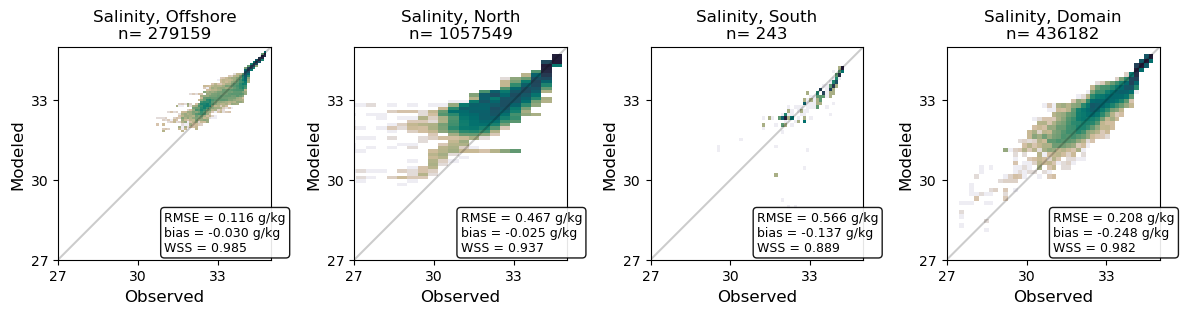

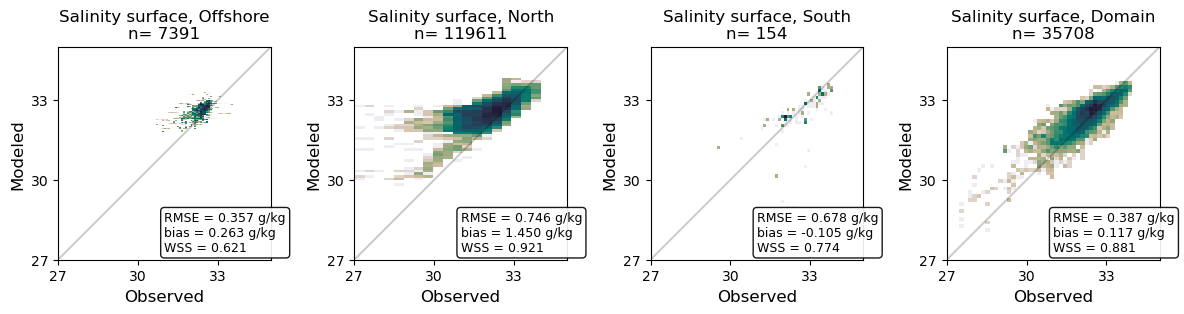

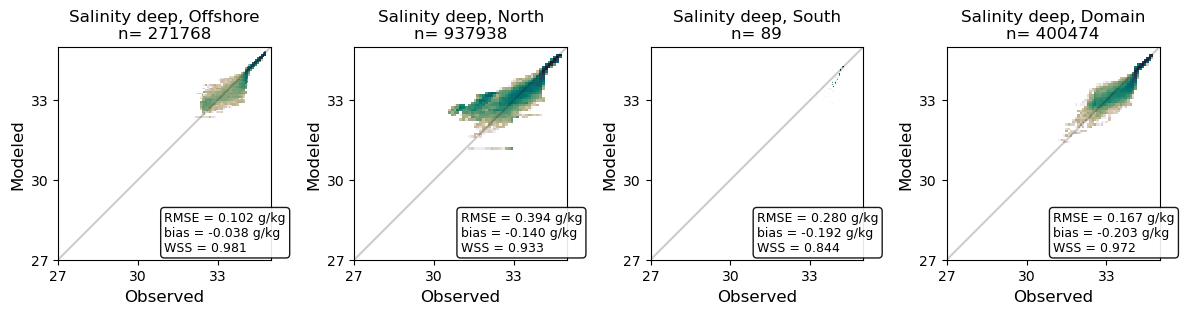

In [14]:
# evals of salinity by region
print("Evaluation of LiveOcean salinity compared to all DFO CTD casts (2017-2021) by region:")

cmap = cm.rain

fig, axs = plt.subplots(1, 4, figsize = (12, 3)) 

for i in range(len(regions)-1): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,4,5])[i]

    axs[i].plot((27,35),(27,35),'k-',alpha=.2)

    iiS=(~np.isnan(obs.SA[obs.region == r]))&(~np.isnan(mod.SA[mod.region == r]))

    counts, xedges, yedges, m2=axs[i].hist2d(obs[obs.region == r].loc[iiS,['SA']].values.flatten(),
                                        mod[mod.region == r].loc[iiS,['SA']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(27, 35, 3)
    axs[i].set_xlim((27,35))
    axs[i].set_ylim((27,35))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'Salinity, '+regions[r-1]+'\nn= '+str(len(obs[obs.region == r]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], obs['SA'][obs.region == r], mod['SA'][mod.region == r], (27,35), 'g/kg')

plt.tight_layout()

# at the surface (top 50 m)
d = -50
fig, axs = plt.subplots(1, 4, figsize = (12, 3)) 

for i in range(len(regions)-1): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,4,5])[i]

    axs[i].plot((27,35),(27,35),'k-',alpha=.2)

    iiS=(~np.isnan(obs.SA[(obs.region == r) & (obs.z > d)]))&(~np.isnan(mod.SA[(mod.region == r) & (mod.z > d)]))

    counts, xedges, yedges, m2=axs[i].hist2d(obs[(obs.region == r) & (obs.z > d)].loc[iiS,['SA']].values.flatten(),
                                        mod[(mod.region == r) & (mod.z > d)].loc[iiS,['SA']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(27, 35, 3)
    axs[i].set_xlim((27,35))
    axs[i].set_ylim((27,35))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'Salinity surface, '+regions[r-1]+'\nn= '+str(len(obs[(obs.region == r) & (obs.z > d)]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], obs['SA'][(obs.region == r) & (obs.z > d)], mod['SA'][(mod.region == r) & (mod.z > d)], (27,35), 'g/kg')

plt.tight_layout()

# deep (below 50 m)
fig, axs = plt.subplots(1, 4, figsize = (12, 3)) 

for i in range(len(regions)-1): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,4,5])[i]

    axs[i].plot((27,35),(27,35),'k-',alpha=.2)

    iiS=(~np.isnan(obs.SA[(obs.region == r) & (obs.z <= d)]))&(~np.isnan(mod.SA[(mod.region == r) & (mod.z <= d)]))

    counts, xedges, yedges, m2=axs[i].hist2d(obs[(obs.region == r) & (obs.z <= d)].loc[iiS,['SA']].values.flatten(),
                                        mod[(mod.region == r) & (mod.z <= d)].loc[iiS,['SA']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(27, 35, 3)
    axs[i].set_xlim((27,35))
    axs[i].set_ylim((27,35))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'Salinity deep, '+regions[r-1]+'\nn= '+str(len(obs[(obs.region == r) & (obs.z <= d)]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], obs['SA'][(obs.region == r) & (obs.z <= d)], mod['SA'][(mod.region == r) & (mod.z <= d)], (27,35), 'g/kg')

plt.tight_layout()


Evaluation of LiveOcean conservative temperature compared to all DFO CTD casts (2017-2021) by region:


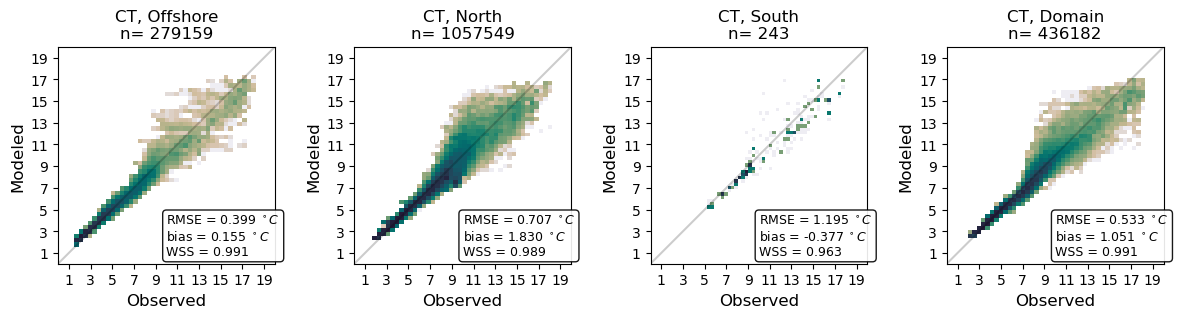

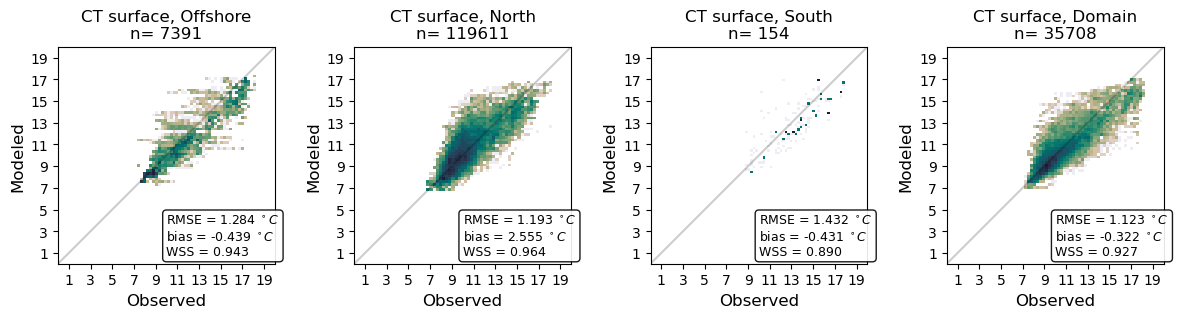

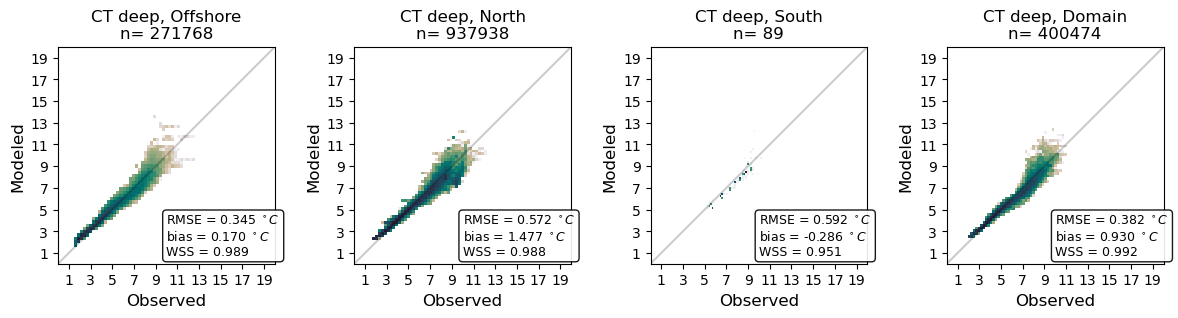

In [15]:
# evals of temperature by region
print("Evaluation of LiveOcean conservative temperature compared to all DFO CTD casts (2017-2021) by region:")

cmap = cm.rain

fig, axs = plt.subplots(1, 4, figsize = (12, 3)) 

for i in range(len(regions)-1): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,4,5])[i]

    axs[i].plot((0,20),(0,20),'k-',alpha=.2)


    iiS=(~np.isnan(obs.CT[obs.region == r]))&(~np.isnan(mod.CT[mod.region == r]))

    counts, xedges, yedges, m2=axs[i].hist2d(obs[obs.region == r].loc[iiS,['CT']].values.flatten(),
                                        mod[mod.region == r].loc[iiS,['CT']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(1, 21, 2)
    axs[i].set_xlim((0,20))
    axs[i].set_ylim((0,20))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'CT, '+regions[r-1]+'\nn= '+str(len(obs[obs.region == r]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], obs['CT'][obs.region == r], mod['CT'][mod.region == r], (0,20), '$^\circ C$')

plt.tight_layout()

# at the surface (top 50 m)
d = -50
fig, axs = plt.subplots(1, 4, figsize = (12, 3)) 

for i in range(len(regions)-1): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,4,5])[i]

    axs[i].plot((0,20),(0,20),'k-',alpha=.2)


    iiS=(~np.isnan(obs.CT[(obs.region == r) & (obs.z > d)]))&(~np.isnan(mod.CT[(mod.region == r) & (mod.z > d)]))

    counts, xedges, yedges, m2=axs[i].hist2d(obs[(obs.region == r) & (obs.z > d)].loc[iiS,['CT']].values.flatten(),
                                        mod[(mod.region == r) & (mod.z > d)].loc[iiS,['CT']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(1, 21, 2)
    axs[i].set_xlim((0,20))
    axs[i].set_ylim((0,20))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'CT surface, '+regions[r-1]+'\nn= '+str(len(obs[(obs.region == r) & (obs.z > d)]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], obs['CT'][(obs.region == r) & (obs.z > d)], mod['CT'][(mod.region == r) & (mod.z > d)], (0,20), '$^\circ C$')

plt.tight_layout()

# deep (below 50 m)
fig, axs = plt.subplots(1, 4, figsize = (12, 3)) 

for i in range(len(regions)-1): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,4,5])[i]

    axs[i].plot((0,20),(0,20),'k-',alpha=.2)


    iiS=(~np.isnan(obs.CT[(obs.region == r) & (obs.z <= d)]))&(~np.isnan(mod.CT[(mod.region == r) & (mod.z <= d)]))

    counts, xedges, yedges, m2=axs[i].hist2d(obs[(obs.region == r) & (obs.z <= d)].loc[iiS,['CT']].values.flatten(),
                                        mod[(mod.region == r) & (mod.z <= d)].loc[iiS,['CT']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(1, 21, 2)
    axs[i].set_xlim((0,20))
    axs[i].set_ylim((0,20))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'CT deep, '+regions[r-1]+'\nn= '+str(len(obs[(obs.region == r) & (obs.z <= d)]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], obs['CT'][(obs.region == r) & (obs.z <= d)], mod['CT'][(mod.region == r) & (mod.z <= d)], (0,20), '$^\circ C$')

plt.tight_layout()


Evaluation of LiveOcean dissolved oxygen compared to all DFO CTD casts (2017-2021) by region:


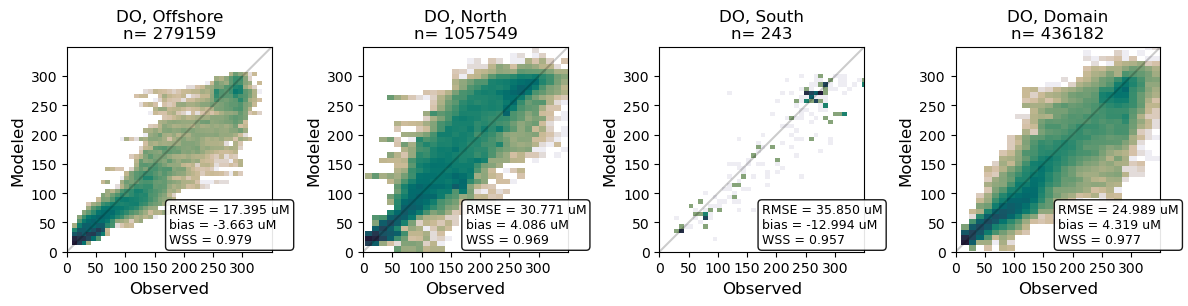

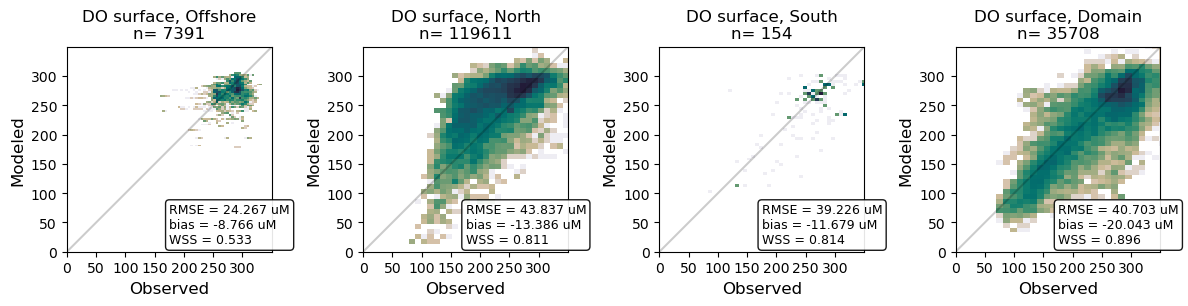

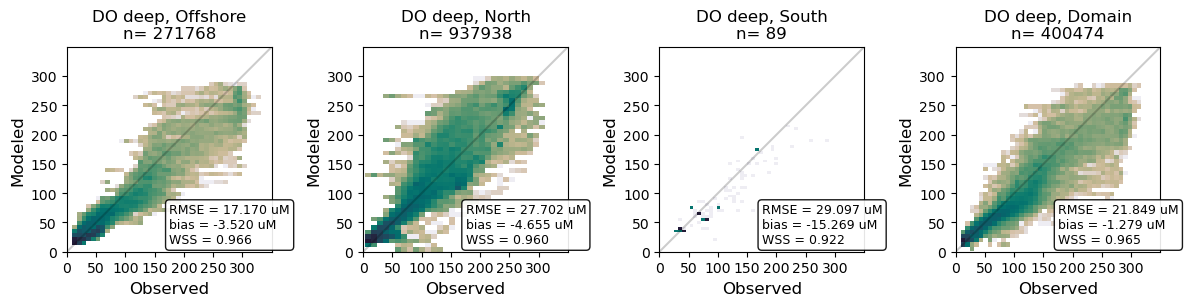

In [16]:
# evals of DO by region
print("Evaluation of LiveOcean dissolved oxygen compared to all DFO CTD casts (2017-2021) by region:")

cmap = cm.rain

fig, axs = plt.subplots(1, 4, figsize = (12, 3)) 

for i in range(len(regions)-1): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,4,5])[i]

    axs[i].plot((0,350),(0,350),'k-',alpha=.2)


    iiS=(~np.isnan(obs['DO (uM)'][obs.region == r]))&(~np.isnan(mod['DO (uM)'][mod.region == r]))

    counts, xedges, yedges, m2=axs[i].hist2d(obs[obs.region == r].loc[iiS,['DO (uM)']].values.flatten(),
                                        mod[mod.region == r].loc[iiS,['DO (uM)']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(0,350, 50)
    axs[i].set_xlim((0,350))
    axs[i].set_ylim((0,350))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'DO, '+regions[r-1]+'\nn= '+str(len(obs[obs.region == r]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], obs['DO (uM)'][obs.region == r], mod['DO (uM)'][mod.region == r], (0,350), 'uM')

plt.tight_layout()

# at the surface (top 50 m)
d = -50
fig, axs = plt.subplots(1, 4, figsize = (12, 3)) 

for i in range(len(regions)-1): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,4,5])[i]

    axs[i].plot((0,350),(0,350),'k-',alpha=.2)


    iiS=(~np.isnan(obs['DO (uM)'][(obs.region == r) & (obs.z > d)]))&(~np.isnan(mod['DO (uM)'][(mod.region == r) & (mod.z > d)]))

    counts, xedges, yedges, m2=axs[i].hist2d(obs[(obs.region == r) & (obs.z > d)].loc[iiS,['DO (uM)']].values.flatten(),
                                        mod[(mod.region == r) & (mod.z > d)].loc[iiS,['DO (uM)']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(0,350, 50)
    axs[i].set_xlim((0,350))
    axs[i].set_ylim((0,350))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'DO surface, '+regions[r-1]+'\nn= '+str(len(obs[(obs.region == r) & (obs.z > d)]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], obs['DO (uM)'][(obs.region == r) & (obs.z > d)], mod['DO (uM)'][(mod.region == r) & (mod.z > d)], (0,350), 'uM')

plt.tight_layout()

# deep (below 50 m)
fig, axs = plt.subplots(1, 4, figsize = (12, 3)) 

for i in range(len(regions)-1): # region 4 (south) has no observations by dfo, salish sea is not my focus, so removing for now

    r = np.array([1,3,4,5])[i]

    axs[i].plot((0,350),(0,350),'k-',alpha=.2)


    iiS=(~np.isnan(obs['DO (uM)'][(obs.region == r) & (obs.z <= d)]))&(~np.isnan(mod['DO (uM)'][(mod.region == r) & (mod.z <= d)]))

    counts, xedges, yedges, m2=axs[i].hist2d(obs[(obs.region == r) & (obs.z <= d)].loc[iiS,['DO (uM)']].values.flatten(),
                                        mod[(mod.region == r) & (mod.z <= d)].loc[iiS,['DO (uM)']].values.flatten(),bins=40,norm=LogNorm(),cmap=cmap)

    # cb0=fig.colorbar(m2,ax=axs[i])
    # # cb0.set_label('Count')

    ntick=np.arange(0,350, 50)
    axs[i].set_xlim((0,350))
    axs[i].set_ylim((0,350))
    axs[i].set_xticks(ntick)
    axs[i].set_yticks(ntick)
        
    axs[i].set_aspect(1, adjustable='box')
    axs[i].set_ylabel('Modeled',fontsize=12)
    axs[i].set_xlabel('Observed',fontsize=12)

    title = 'DO deep, '+regions[r-1]+'\nn= '+str(len(obs[(obs.region == r) & (obs.z <= d)]))
    axs[i].set_title(title,fontsize=12)

    # plot the stats pannel
    plot_panel(axs[i], obs['DO (uM)'][(obs.region == r) & (obs.z <= d)], mod['DO (uM)'][(mod.region == r) & (mod.z <= d)], (0,350), 'uM')

plt.tight_layout()


# Property-property plots
See if the same water masses show up even if the properties or locations don't match perfectly

In [17]:
def prop_prop(ax,stringX,stringY,x,y,binX,binY):
    cmap = cm.rain
    cmap.set_bad('w')
    # cmap.set_extremes(under='w')

    bins = [binX,binY]
    H, xedges, yedges=np.histogram2d(x,y,bins=bins)
    H = H.T
    H_final = np.where(H>0, H, H*np.nan)
    X, Y = np.meshgrid(xedges, yedges)
    im = ax.pcolormesh(X, Y, H_final, cmap=cmap, norm=LogNorm(vmin=10, vmax=45000))
    ax.set_ylabel(stringY)
    ax.set_xlabel(stringX)


In [18]:
#set consistent bins
Tbin = np.linspace(0,20,100)
Sbin = np.linspace(25,37,100)
Dbin = np.linspace(0,350,100)

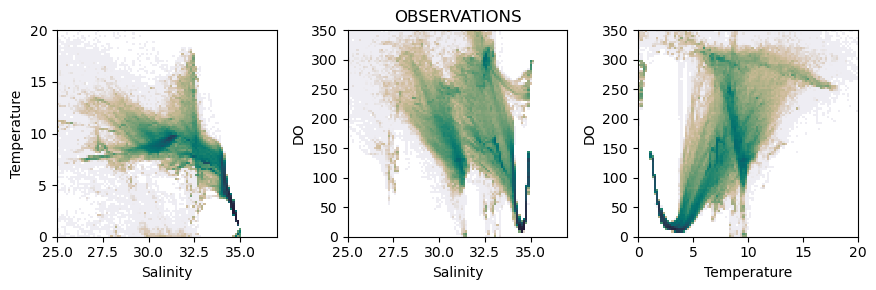

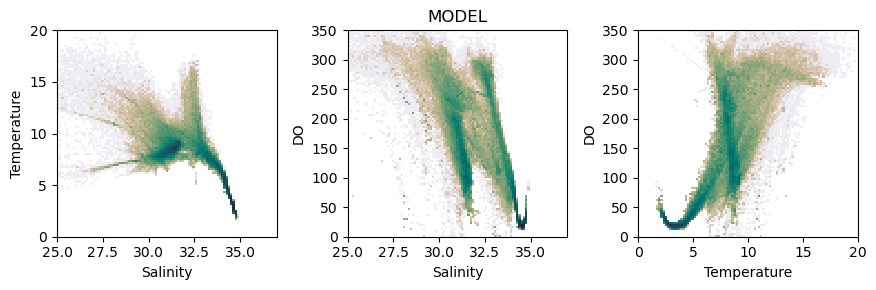

In [19]:
# obs versus model property property plots
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

#obs
prop_prop(axs[0],"Salinity","Temperature",obs.SA,obs.CT,Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",obs.SA,obs["DO (uM)"],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",obs.CT,obs["DO (uM)"],Tbin,Dbin)
axs[1].set_title('OBSERVATIONS')

plt.tight_layout()

# and model
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

prop_prop(axs[0],"Salinity","Temperature",mod.SA,mod.CT,Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",mod.SA,mod['DO (uM)'],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",mod.CT,mod['DO (uM)'],Tbin,Dbin)
axs[1].set_title('MODEL')

plt.tight_layout()


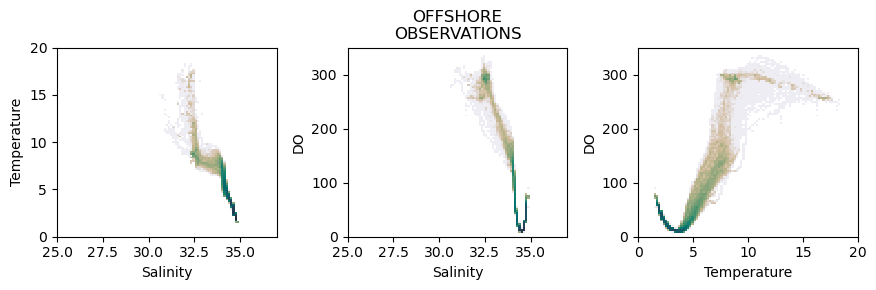

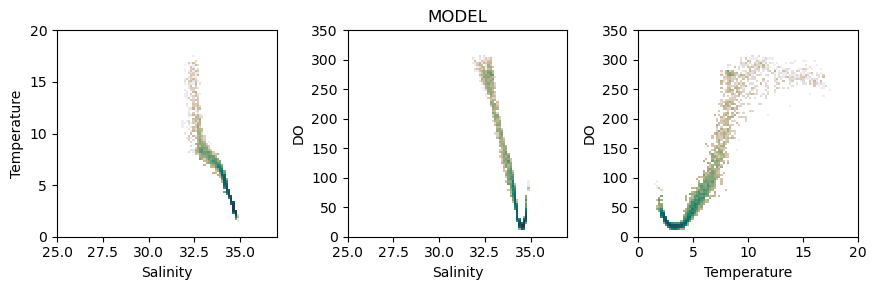

In [20]:
# same thing but by region
#OFFSHORE
r=1

# obs versus model property property plots
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

#obs
prop_prop(axs[0],"Salinity","Temperature",obs.SA[obs.region == r],obs.CT[obs.region == r],Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",obs.SA[obs.region == r],obs["DO (uM)"][obs.region == r],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",obs.CT[obs.region == r],obs["DO (uM)"][obs.region == r],Tbin,Dbin)
axs[1].set_title('OFFSHORE\nOBSERVATIONS')

plt.tight_layout()

# and model
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

prop_prop(axs[0],"Salinity","Temperature",mod.SA[mod.region == r],mod.CT[mod.region == r],Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",mod.SA[mod.region == r],mod["DO (uM)"][mod.region == r],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",mod.CT[mod.region == r],mod["DO (uM)"][mod.region == r],Tbin,Dbin)
axs[1].set_title('MODEL')

plt.tight_layout()

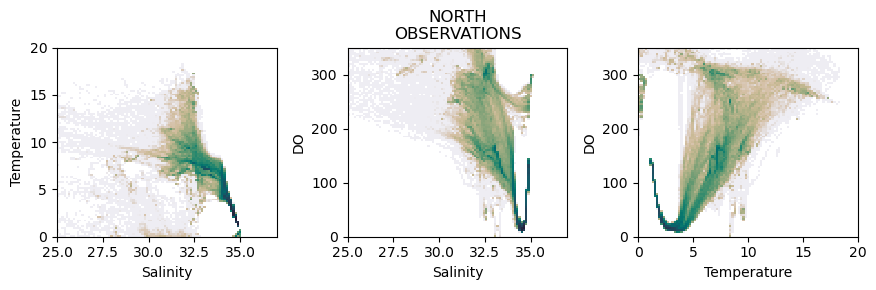

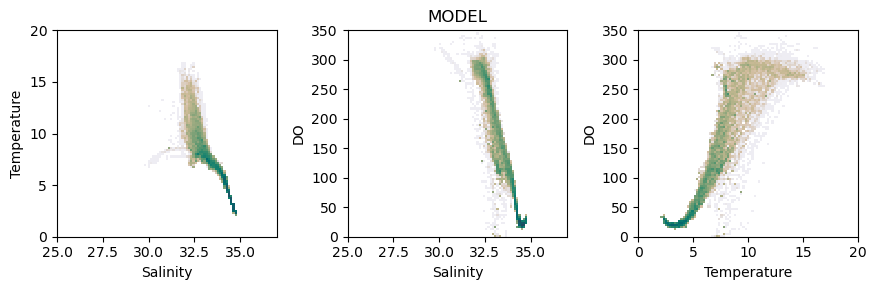

In [21]:
# same thing but by region
r=3
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

#obs
prop_prop(axs[0],"Salinity","Temperature",obs.SA[obs.region == r],obs.CT[obs.region == r],Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",obs.SA[obs.region == r],obs["DO (uM)"][obs.region == r],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",obs.CT[obs.region == r],obs["DO (uM)"][obs.region == r],Tbin,Dbin)
axs[1].set_title('NORTH\nOBSERVATIONS')

plt.tight_layout()

# and model
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

prop_prop(axs[0],"Salinity","Temperature",mod.SA[mod.region == r],mod.CT[mod.region == r],Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",mod.SA[mod.region == r],mod["DO (uM)"][mod.region == r],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",mod.CT[mod.region == r],mod["DO (uM)"][mod.region == r],Tbin,Dbin)
axs[1].set_title('MODEL')

plt.tight_layout()

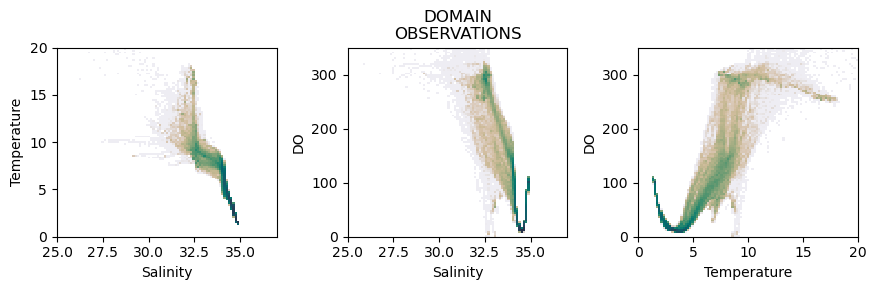

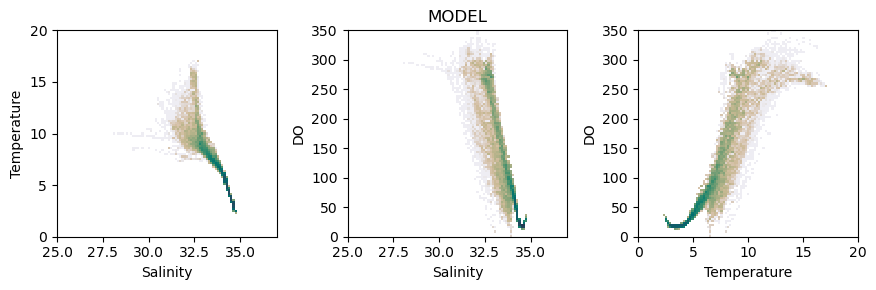

In [22]:
# same thing but by region
r=5
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

#obs
prop_prop(axs[0],"Salinity","Temperature",obs.SA[obs.region == r],obs.CT[obs.region == r],Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",obs.SA[obs.region == r],obs["DO (uM)"][obs.region == r],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",obs.CT[obs.region == r],obs["DO (uM)"][obs.region == r],Tbin,Dbin)
axs[1].set_title('DOMAIN\nOBSERVATIONS')

plt.tight_layout()

# and model
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

prop_prop(axs[0],"Salinity","Temperature",mod.SA[mod.region == r],mod.CT[mod.region == r],Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",mod.SA[mod.region == r],mod["DO (uM)"][mod.region == r],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",mod.CT[mod.region == r],mod["DO (uM)"][mod.region == r],Tbin,Dbin)
axs[1].set_title('MODEL')

plt.tight_layout()

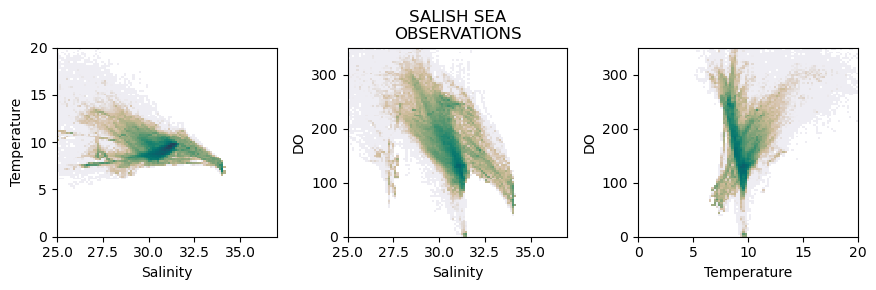

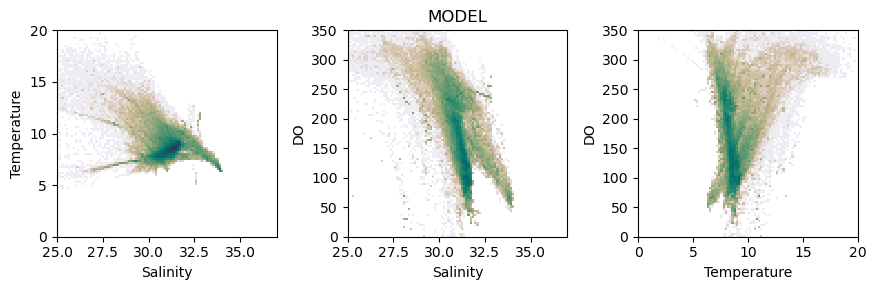

In [23]:
# same thing but by region
r=2
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

#obs
prop_prop(axs[0],"Salinity","Temperature",obs.SA[obs.region == r],obs.CT[obs.region == r],Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",obs.SA[obs.region == r],obs["DO (uM)"][obs.region == r],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",obs.CT[obs.region == r],obs["DO (uM)"][obs.region == r],Tbin,Dbin)
axs[1].set_title('SALISH SEA\nOBSERVATIONS')

plt.tight_layout()

# and model
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

prop_prop(axs[0],"Salinity","Temperature",mod.SA[mod.region == r],mod.CT[mod.region == r],Sbin,Tbin)
prop_prop(axs[1],"Salinity","DO",mod.SA[mod.region == r],mod["DO (uM)"][mod.region == r],Sbin,Dbin)
prop_prop(axs[2],"Temperature","DO",mod.CT[mod.region == r],mod["DO (uM)"][mod.region == r],Tbin,Dbin)
axs[1].set_title('MODEL')

plt.tight_layout()

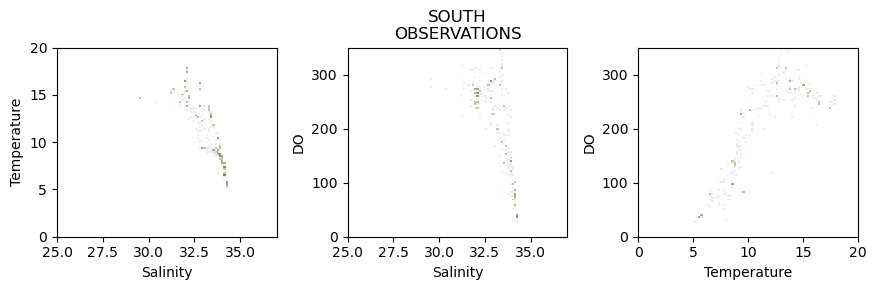

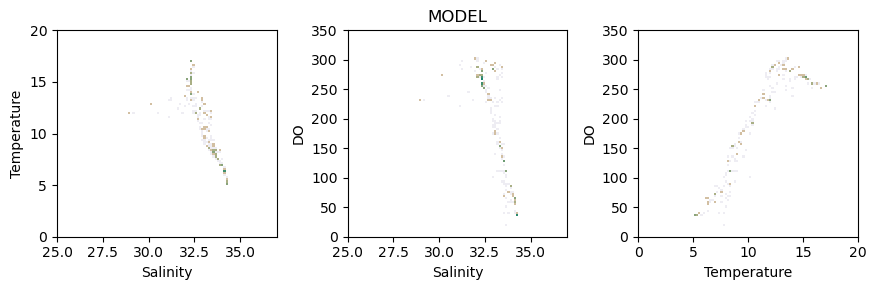

In [24]:
def prop_prop_south(ax,stringX,stringY,x,y,binX,binY):
    cmap = cm.rain
    cmap.set_bad('w')
    # cmap.set_extremes(under='w')

    bins = [binX,binY]
    H, xedges, yedges=np.histogram2d(x,y,bins=bins)
    H = H.T
    H_final = np.where(H>0, H, H*np.nan)
    X, Y = np.meshgrid(xedges, yedges)
    im = ax.pcolormesh(X, Y, H_final, cmap=cmap, norm=LogNorm(vmin=1, vmax=50))
    ax.set_ylabel(stringY)
    ax.set_xlabel(stringX)

# same thing but by region
r=4
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

#obs
prop_prop_south(axs[0],"Salinity","Temperature",obs.SA[obs.region == r],obs.CT[obs.region == r],Sbin,Tbin)
prop_prop_south(axs[1],"Salinity","DO",obs.SA[obs.region == r],obs["DO (uM)"][obs.region == r],Sbin,Dbin)
prop_prop_south(axs[2],"Temperature","DO",obs.CT[obs.region == r],obs["DO (uM)"][obs.region == r],Tbin,Dbin)
axs[1].set_title('SOUTH\nOBSERVATIONS')

plt.tight_layout()

# and model
fig, axs = plt.subplots(1, 3, figsize = (9, 3)) 

prop_prop_south(axs[0],"Salinity","Temperature",mod.SA[mod.region == r],mod.CT[mod.region == r],Sbin,Tbin)
prop_prop_south(axs[1],"Salinity","DO",mod.SA[mod.region == r],mod["DO (uM)"][mod.region == r],Sbin,Dbin)
prop_prop_south(axs[2],"Temperature","DO",mod.CT[mod.region == r],mod["DO (uM)"][mod.region == r],Tbin,Dbin)
axs[1].set_title('MODEL')

plt.tight_layout()

# Property profiles by region

In [25]:
import scipy.stats as stat

In [26]:
obs

,cid,lon,lat,time,z,SA,CT,DO (uM),NO3 (uM),Chl (mg m-3),name,cruise,source,NO2 (uM),NH4 (uM),PO4 (uM),TA (uM),DIC (uM),region
0,0.0,-126.334000,48.624500,2017-02-07 14:50:45,-5.900000,32.698785,9.202596,282.233429,5.9,0.57,bottle,None,dfo1,NaN,NaN,NaN,NaN,NaN,5
1,0.0,-126.334000,48.624500,2017-02-07 14:50:45,-101.000000,33.011381,9.468307,227.394394,NaN,NaN,bottle,None,dfo1,NaN,NaN,NaN,NaN,NaN,5
2,0.0,-126.334000,48.624500,2017-02-07 14:50:45,-800.400024,34.465713,3.977202,12.102098,NaN,NaN,bottle,None,dfo1,NaN,NaN,NaN,NaN,NaN,5
3,1.0,-126.667000,48.648499,2017-02-07 16:39:50,-200.300003,34.024404,7.695498,139.330414,NaN,NaN,bottle,None,dfo1,NaN,NaN,NaN,NaN,NaN,5
4,1.0,-126.667000,48.648499,2017-02-07 16:39:50,-200.399994,34.024506,7.696186,139.776993,NaN,NaN,bottle,None,dfo1,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325789,275.0,-123.939056,49.310513,2021-02-03 16:37:06,-395.200012,31.417459,9.322629,NaN,NaN,NaN,None,None,dfo1,NaN,NaN,NaN,NaN,NaN,2
2325790,275.0,-123.939056,49.310513,2021-02-03 16:37:06,-396.200012,31.417479,9.322717,NaN,NaN,NaN,None,None,dfo1,NaN,NaN,NaN,NaN,NaN,2
2325791,275.0,-123.939056,49.310513,2021-02-03 16:37:06,-397.100006,31.417095,9.322925,NaN,NaN,NaN,None,None,dfo1,NaN,NaN,NaN,NaN,NaN,2
2325792,275.0,-123.939056,49.310513,2021-02-03 16:37:06,-398.100006,31.416412,9.324027,NaN,NaN,NaN,None,None,dfo1,NaN,NaN,NaN,NaN,NaN,2


In [32]:
def profiles(tracer,r,colour,ax):
    if tracer == 'Salinity':
        t = 'SA'
        unit = 'g/kg'
    elif tracer == 'Temperature':
        t = 'CT'
        unit = '$^{\circ} C$'
    elif tracer == 'DO':
        t = 'DO (uM)'
        unit = 'uM'
    elif tracer == 'NO3':
        t = 'NO3 (uM)'
        unit = 'uM'
    elif tracer == 'TA':
        t = 'TA (uM)'
        unit = 'uM'

    avg_obs, bins, _ = stat.binned_statistic(obs['z'][(obs.region==r)&(np.isfinite(obs[t]))],obs[t][(obs.region==r)&(np.isfinite(obs[t]))],statistic='mean',bins=50)
    avg_mod, bins, _ = stat.binned_statistic(mod['z'][(mod.region==r)&(np.isfinite(mod[t]))],mod[t][(mod.region==r)&(np.isfinite(mod[t]))],statistic='mean',bins=50)

    ax.plot(avg_mod, bins[:-1], c=colour,lw=2,ls='dashed')
    ax.plot(avg_obs, bins[:-1],c=colour,lw=2,label=regions[r-1])

    title = tracer
    ax.set_title(title)
    ax.set_xlabel(unit)
    ax.set_yticks([])
    # ax.set_ylim([-3000,10])


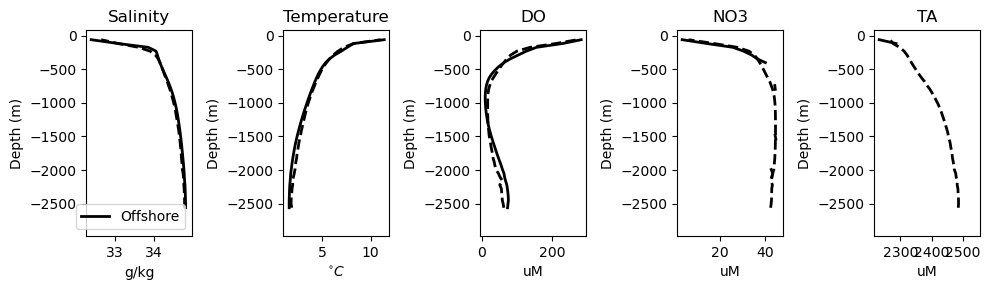

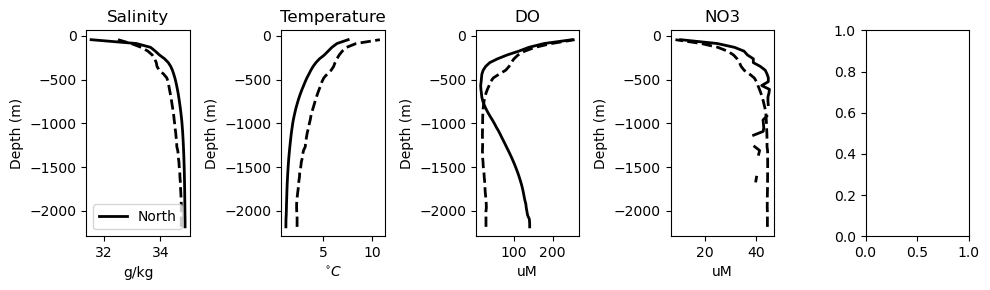

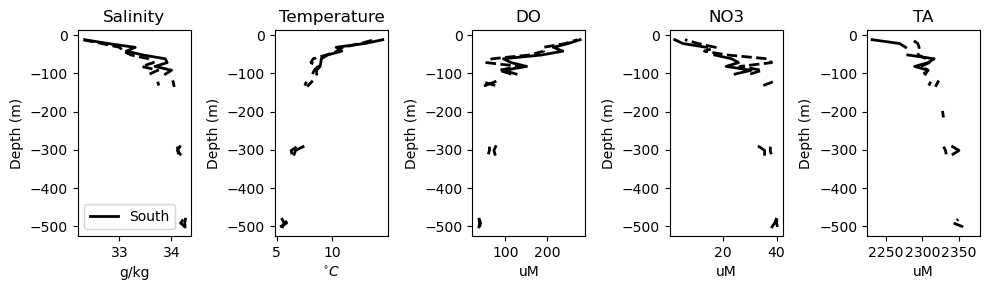

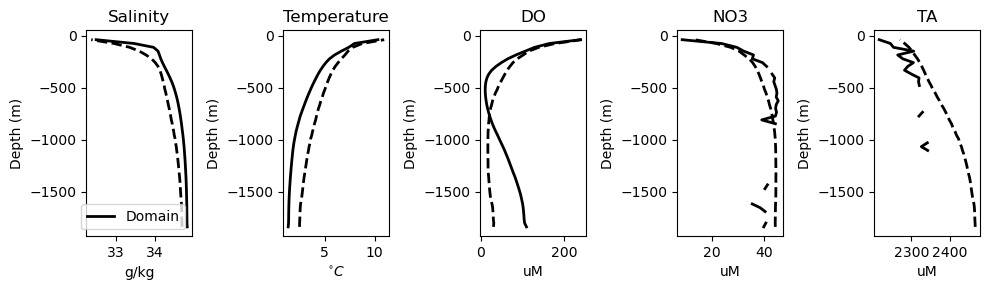

In [28]:
r=1
fig, ax = plt.subplots(1,5, figsize=(10,3))
profiles('Salinity',r,'k',ax[0])
profiles('Temperature',r,'k',ax[1])
profiles('DO',r,'k',ax[2])
profiles('NO3',r,'k',ax[3])
profiles('TA',r,'k',ax[4])
ax[0].legend()
plt.tight_layout()


r=3
fig, ax = plt.subplots(1,5, figsize=(10,3))
profiles('Salinity',r,'k',ax[0])
profiles('Temperature',r,'k',ax[1])
profiles('DO',r,'k',ax[2])
profiles('NO3',r,'k',ax[3])
# profiles('TA','k',r,ax[4])
ax[0].legend()
plt.tight_layout()


r=4
fig, ax = plt.subplots(1,5, figsize=(10,3))
profiles('Salinity',r,'k',ax[0])
profiles('Temperature',r,'k',ax[1])
profiles('DO',r,'k',ax[2])
profiles('NO3',r,'k',ax[3])
profiles('TA',r,'k',ax[4])
ax[0].legend()
plt.tight_layout()


r=5
fig, ax = plt.subplots(1,5, figsize=(10,3))
profiles('Salinity',r,'k',ax[0])
profiles('Temperature',r,'k',ax[1])
profiles('DO',r,'k',ax[2])
profiles('NO3',r,'k',ax[3])
profiles('TA',r,'k',ax[4])
ax[0].legend()

plt.tight_layout()


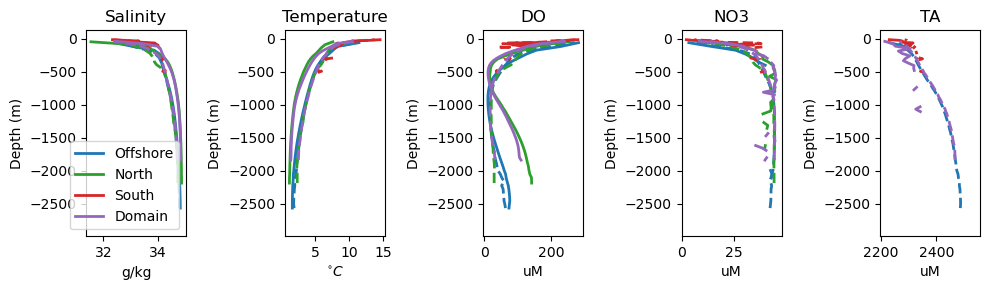

In [29]:
r=1
fig, ax = plt.subplots(1,5, figsize=(10,3))
profiles('Salinity',r,'tab:blue', ax[0])
profiles('Temperature',r,'tab:blue', ax[1])
profiles('DO',r,'tab:blue', ax[2])
profiles('NO3',r,'tab:blue', ax[3])
profiles('TA',r,'tab:blue', ax[4])

r=3
profiles('Salinity',r,'tab:green',ax[0])
profiles('Temperature',r,'tab:green',ax[1])
profiles('DO',r,'tab:green',ax[2])
profiles('NO3',r,'tab:green',ax[3])
# profiles('TA',r,'tab:green',ax[4])

r=4
profiles('Salinity',r,'tab:red',ax[0])
profiles('Temperature',r,'tab:red',ax[1])
profiles('DO',r,'tab:red',ax[2])
profiles('NO3',r,'tab:red',ax[3])
profiles('TA',r,'tab:red',ax[4])

r=5
profiles('Salinity',r,'tab:purple',ax[0])
profiles('Temperature',r,'tab:purple',ax[1])
profiles('DO',r,'tab:purple',ax[2])
profiles('NO3',r,'tab:purple',ax[3])
profiles('TA',r,'tab:purple',ax[4])
ax[0].legend()

plt.tight_layout()

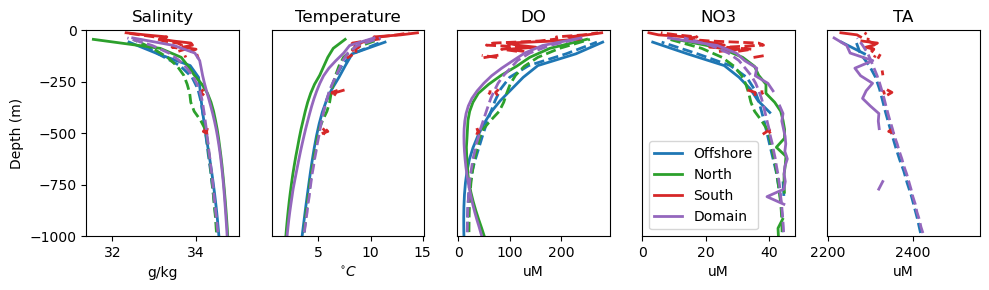

In [38]:
r=1
fig, ax = plt.subplots(1,5, figsize=(10,3))
profiles('Salinity',r,'tab:blue', ax[0])
profiles('Temperature',r,'tab:blue', ax[1])
profiles('DO',r,'tab:blue', ax[2])
profiles('NO3',r,'tab:blue', ax[3])
profiles('TA',r,'tab:blue', ax[4])

r=3
profiles('Salinity',r,'tab:green',ax[0])
profiles('Temperature',r,'tab:green',ax[1])
profiles('DO',r,'tab:green',ax[2])
profiles('NO3',r,'tab:green',ax[3])
# profiles('TA',r,'tab:green',ax[4])

r=4
profiles('Salinity',r,'tab:red',ax[0])
profiles('Temperature',r,'tab:red',ax[1])
profiles('DO',r,'tab:red',ax[2])
profiles('NO3',r,'tab:red',ax[3])
profiles('TA',r,'tab:red',ax[4])

r=5
profiles('Salinity',r,'tab:purple',ax[0])
profiles('Temperature',r,'tab:purple',ax[1])
profiles('DO',r,'tab:purple',ax[2])
profiles('NO3',r,'tab:purple',ax[3])
profiles('TA',r,'tab:purple',ax[4])
ax[3].legend()

ax[0].set_ylabel('Depth (m)')
# ax[0].set_yticks([-500,-400,-300,-200,-100,0])
ax[0].set_yticks(np.linspace(-1000,0,5))

ax[0].set_ylim([-1000,0])
ax[1].set_ylim([-1000,0])
ax[2].set_ylim([-1000,0])
ax[3].set_ylim([-1000,0])
ax[4].set_ylim([-1000,0])
plt.tight_layout()

In [37]:
np.linspace(-1000,0,5)

array([-1000.,  -750.,  -500.,  -250.,     0.])